In [1]:
from mpl_toolkits import mplot3d

%matplotlib notebook

import csv
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.stats import mode
from sklearn.metrics import accuracy_score

os.chdir("/Users/Aritomo/Documents/kivy")

print("-------")
print(os.getcwd())

#fig = plt.figure()
#ax = plt.axes(projection="3d")


with open('NewAllData.csv', 'r') as csvfile:
    df = pd.read_csv(csvfile, names=['MQ-3', 'MQ-136', 'MQ-137', 'MQ-5', 'sens5', 'sens6','target'],skiprows = 0)
    #next(df)
    
    
    
    features = ['MQ-3', 'MQ-137', 'MQ-5','sens5','sens6']
    # Separating out the features
    x = df.loc[:, features].values
    # Separating out the target
    y = df.loc[:,['target']].values
    # Standardizing the features
    #x = StandardScaler().fit_transform(x)
    print("-------")
    #print(df)
    #print(df.loc[:, features].values)
    #print(df.loc[:,['target']].values)
    
    sensor1list = (df.loc[:, features[0]].values)
    np.average(sensor1list)
    
    #print((len(sensor1list)-1)/60)
    numOfAvgs = int(np.floor(len(sensor1list)/60))
    print(numOfAvgs)
    avgDf = pd.DataFrame(columns = ['MQ-3','MQ-137', 'MQ-5', 'sens5', 'sens6','target'])
    print("-------")
    print(df)
    #d2 = pd.DataFrame(columns = ['target'])
    d=[]
    d2=[]
    for y in range(len(features)):
        sensorList = df.loc[:, features[y]].values
        #print(y)
        
        #d1 = pd.DataFrame(columns = [features[y]])
        d1=[]
        for x in range(numOfAvgs):
            #print(x)
            
            thisAvg = np.average(sensorList[60*(x):59+60*x])
            column = features[y]
            #d1 = d1.append({column: thisAvg}, ignore_index=True)
            d1.append(thisAvg)
            if(y==0):
                targList = df.loc[:,'target'].values
                #print(targList)
                #print(targList[x*60+5])
                d2.append(targList[x*60+5])
                #d2 = d2.append({'target': targList[x*60+5] }, ignore_index = True)
                #print(d2)
            
        #print(d.values)
        avgDf[features[y]] = d1
    #print(d)
    #avgData = np.ndarray([d[0],d[1],d[2],d[2],d[4]])
    #avgData = np.array([[1, 2, 3,4,5,6], [4, 5, 6,7,8,9]])
    #avgDf = pd.DataFrame(data = avgData,columns = ['MQ-3', 'MQ-137','MQ-5','sens5', 'sens6','target'])
    print(d2)
    avgDf['target'] = d2
    print(avgDf)

-------
/Users/Aritomo/Documents/kivy
-------
30
-------
      MQ-3  MQ-136  MQ-137  MQ-5  sens5  sens6      target
0      119     112      17    73      7     73  LemonGrass
1      120     112      17    73      7     72  LemonGrass
2      119     114      17    73      7     72  LemonGrass
3      119     126      17    73      7     73  LemonGrass
4      119     128      17    73      7     73  LemonGrass
...    ...     ...     ...   ...    ...    ...         ...
1795   254     227      27    79     11     91     TeaTree
1796   253     226      27    79     11     90     TeaTree
1797   252     221      27    79     10     91     TeaTree
1798   251     209      27    79     11     90     TeaTree
1799   252     209      27    79     11     90     TeaTree

[1800 rows x 7 columns]
['LemonGrass', 'LemonGrass', 'LemonGrass', 'LemonGrass', 'LemonGrass', 'Orange', 'Orange', 'Orange', 'Orange', 'Orange', 'Lavendar', 'Lavendar', 'Lavendar', 'Lavendar', 'Lavendar', 'Peppermint', 'Peppermint', '

In [2]:
features = ['MQ-3', 'MQ-137', 'MQ-5', 'sens5', 'sens6']
# Separating out the features
x = avgDf.loc[:, features].values
# Separating out the target
y = avgDf.loc[:,['target']].values
# Standardizing the features
scaler = StandardScaler()
oldX = x
x = scaler.fit_transform(x)
means = scaler.mean_ 
var = scaler.var_
print(means)
print(var)

print(type(means))
print(type(var))

[173.81242938  20.37514124  68.11129944  11.99491525  75.62316384]
[7277.67051486   26.54321044   35.73150787   14.78966102  157.73554885]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


    principal component 1  principal component 2      target
0               -0.706862              -1.496560  LemonGrass
1               -0.336939              -1.694923  LemonGrass
2               -0.811559              -1.526353  LemonGrass
3               -0.811559              -1.526353  LemonGrass
4               -0.717544              -1.598896  LemonGrass
5                1.689921               1.620715      Orange
6                2.083643               1.462403      Orange
7                0.525331               0.634576      Orange
8                1.193460               0.971661      Orange
9                0.756165               0.853775      Orange
10              -0.979245              -0.697986    Lavendar
11              -1.152825              -0.625495    Lavendar
12              -1.120601              -0.608041    Lavendar
13              -1.104543              -0.593182    Lavendar
14              -1.062968              -0.654537    Lavendar
15              -0.70515

<IPython.core.display.Javascript object>


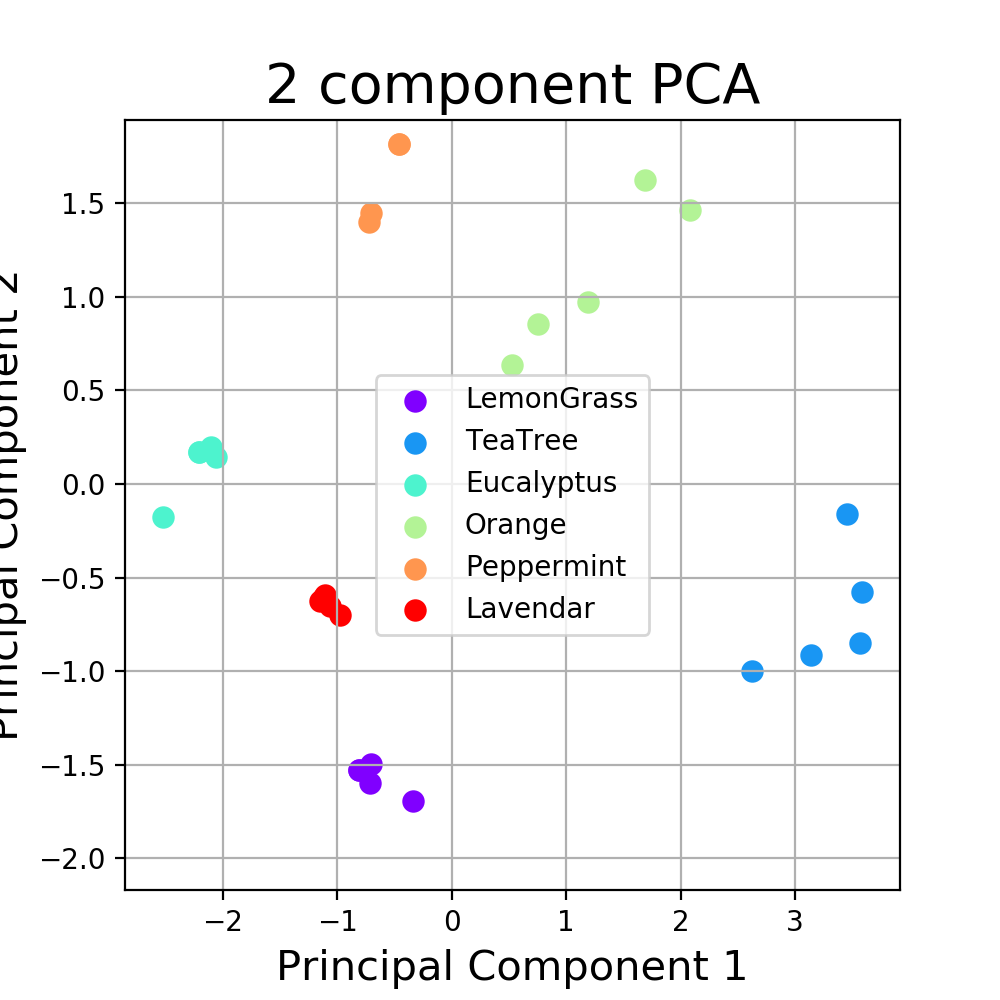

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

In [8]:
%matplotlib notebook

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, avgDf[['target']]], axis = 1)
print(finalDf)

components = pca.components_
print(components)
print(type(components))
labelsNames = []
labelsNums = []

fig = plt.figure(figsize = (5,5))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['LemonGrass','TeaTree', 'Eucalyptus', 'Orange', 'Peppermint', 'Lavendar']
colors = cm.rainbow(np.linspace(0, 1, 6))

num_trials = 5
i = 0
for target, color in zip(targets,colors):
    i+=1
    for q in range(num_trials):
        labelsNums.append(i-1)
        labelsNames.append(target)
    indicesToKeep = finalDf['target'] == target
    #print(indicesToKeep)
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)

ax.legend(targets)
ax.grid()
#print(labelsNames)
#print(labelsNums)

<IPython.core.display.Javascript object>


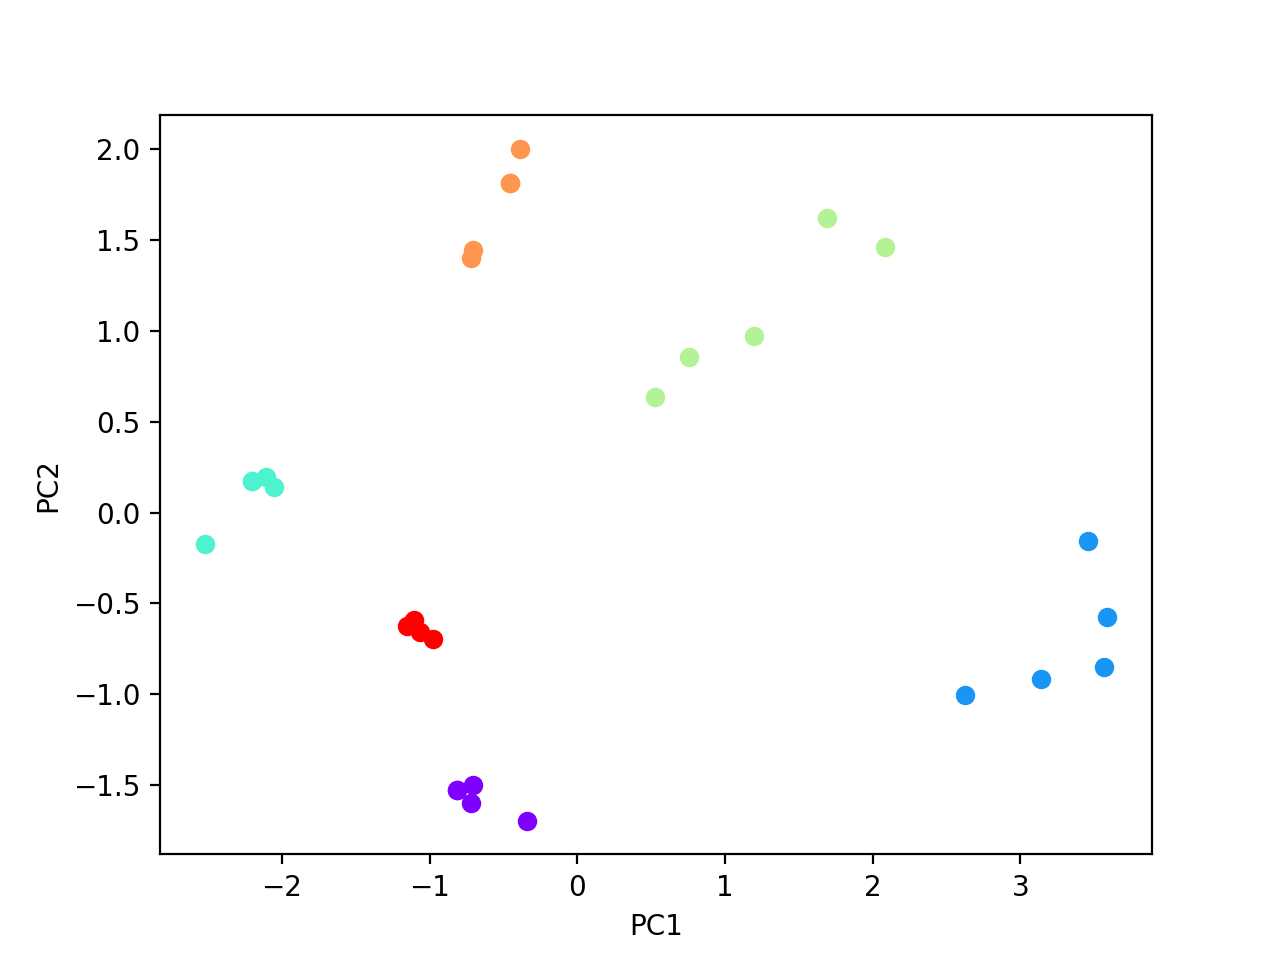

In [9]:
data_as_nparray = finalDf.values

X = data_as_nparray[:,0:2]
true_label = data_as_nparray[:,2]
#print(X.shape, true_label.shape)
#print(X[0:5,:], true_label[0:5])

#print(X)
#print(true_label)

plt.figure()

for target, color in zip(targets,colors):
    idx = np.where(true_label == target)
    plt.plot(X[idx,0], X[idx,1], 'o', color = color)
    plt.xlabel('PC1')
    plt.ylabel('PC2')

In [10]:
num_smells = len(targets)#5
model = KMeans(n_clusters = num_smells)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

[[-2.21769392  0.1011942 ]
 [ 1.24970396  1.10862593]
 [ 3.27463017 -0.6993587 ]
 [-0.67689279 -1.5686168 ]
 [-0.54571097  1.69400375]
 [-1.08403645 -0.63584837]]


<IPython.core.display.Javascript object>


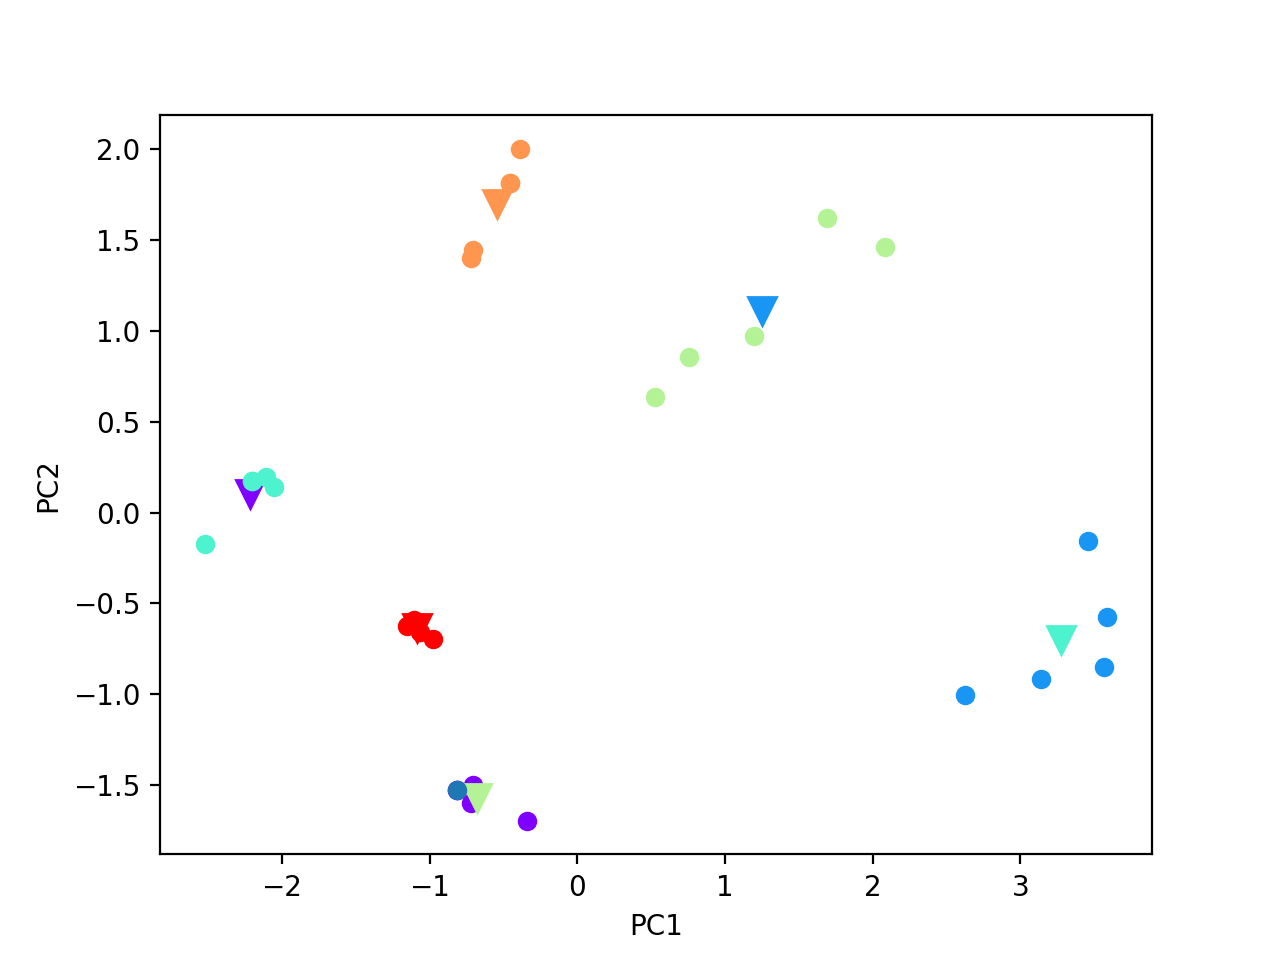

-22
12
33
-7
-5
-11
[]


In [11]:
cluster_centers = model.cluster_centers_
print(cluster_centers)
plt.figure()
labelsList = []
i = 0

conversion = []
for i, (target, color) in enumerate(zip(targets,colors)):
    idx = np.where(true_label == target)
    plt.plot(X[idx,0], X[idx,1], 'o', color = color, alpha = 1)
    plt.plot(cluster_centers[i,0], cluster_centers[i,1], 'v',
             ms = 10, color = color)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    
    centerRnd = int(np.round(cluster_centers[i,0]*10))
    print(centerRnd)
    
        
print(conversion)

In [12]:
#labels = np.zeros_like(model)
#for i in range(6):
    #mask = (model == i)
    #labels[mask] = mode(digits.target[mask])[0]

import pickle
pickle.dump(model, open("model.pkl", "wb"))
pred_labels = model.labels_
print(pred_labels)
print(labelsNums)
for lb in pred_labels:
    centerRnd = int(np.round(cluster_centers[lb,0]*10))
    if(centerRnd==36):
        print(5)
    if(centerRnd==-13):
        print(2)
    if(centerRnd==18):
        print(1)
    if(centerRnd==-7):
        print(3)
    if(centerRnd==-23):
        print(4)
    if(centerRnd==-10):
        print(0)

[3 3 3 3 3 1 1 1 1 1 5 5 5 5 5 4 4 4 4 4 0 0 0 0 0 2 2 2 2 2]
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5]
3
3
3
3
3


In [17]:
with open('TTT.txt', 'r') as csvfile:
    df = pd.read_csv(csvfile, names=['MQ-3', 'MQ-136', 'MQ-137', 'MQ-5', 'sens5', 'sens6'],skiprows = 0)
    
    features = ['MQ-3', 'MQ-137', 'MQ-5','sens5','sens6']

    x = df.loc[:, features].values
    
    sensor1list = (df.loc[:, features[0]].values)
    np.average(sensor1list)

    numOfAvgs = int(np.floor(len(sensor1list)/60))
    print(numOfAvgs)
    avgDf = pd.DataFrame(columns = ['MQ-3','MQ-137', 'MQ-5', 'sens5', 'sens6'])
    print("-------")
    print(df)
    #d2 = pd.DataFrame(columns = ['target'])
    d=[]
    d2=[]
    for y in range(len(features)):
        sensorList = df.loc[:, features[y]].values
        #print(y)
        
        #d1 = pd.DataFrame(columns = [features[y]])
        d1=[]
        for x in range(numOfAvgs):
            #print(x)
            
            thisAvg = np.average(sensorList[60*(x):59+60*x])
            column = features[y]
            #d1 = d1.append({column: thisAvg}, ignore_index=True)
            d1.append(thisAvg)
            
        #print(d.values)
        avgDf[features[y]] = d1
    #print(d)
    #avgData = np.ndarray([d[0],d[1],d[2],d[2],d[4]])
    #avgData = np.array([[1, 2, 3,4,5,6], [4, 5, 6,7,8,9]])
    #avgDf = pd.DataFrame(data = avgData,columns = ['MQ-3', 'MQ-137','MQ-5','sens5', 'sens6','target'])
    print(avgDf)
    
    x = avgDf.values
    print(x)
    
    means = np.array([173.81242938,20.37514124,68.11129944,11.99491525,75.62316384])
    var = np.array([7277.67051486,26.54321044,35.73150787,14.78966102,157.73554885])
    
    components = np.array([[ 0.50740275,0.53401019,0.39105299,0.12552029,0.53730604],
 [ 0.11551197,-0.03304687,-0.53916661,0.82437296,0.12358591]])
    x = ((x-means)/var**0.5)
    comp1 = np.dot(x,components[0])
    
    comp2 = np.dot(x,components[1])
    print(comp1)
    print(comp2)
    
    pr = ([comp1[0],comp2[0]],[comp1[0],comp2[0]])
    pr = model.predict(pr)
    
    print(pr)
    ind = (pr[0])
    centerRnd = int(np.round(cluster_centers[pr[0],0]*10))
    if(centerRnd==36):
        print(5)
        print("Lavendar")
    if(centerRnd==-13):
        print(2)
        print("Eucalyptus")
    if(centerRnd==18):
        print(1)
        print("Orange")
    if(centerRnd==-7):
        print(3)
        print("TeaTree")
    if(centerRnd==-23):
        print(4)
        print("Peppermint")
    if(centerRnd==-10):
        print(0)
        print("LemonGrass")
        
    plt.plot(comp1, comp2, 'o', alpha = 1)
    

1
-------
     MQ-3  MQ-136  MQ-137  MQ-5  sens5  sens6
0   229.0    14.0    15.0  83.0   10.0   86.0
1   224.0    14.0    15.0  83.0    9.0   85.0
2   223.0    14.0    14.0  83.0   10.0   85.0
3   223.0    14.0    14.0  82.0   10.0   85.0
4   224.0    13.0    14.0  82.0   10.0   85.0
5   228.0    13.0    15.0  82.0    9.0   85.0
6   228.0    13.0    15.0  82.0   10.0   86.0
7   226.0    14.0    15.0  82.0   10.0   86.0
8   224.0    13.0    15.0  82.0   12.0   87.0
9   220.0    13.0    15.0  82.0   11.0   87.0
10  220.0    14.0    15.0  82.0   11.0   87.0
11  220.0    13.0    15.0  82.0   11.0   88.0
12  214.0    13.0    14.0  82.0   10.0   87.0
13  213.0    13.0    14.0  82.0   10.0   87.0
14  219.0    14.0    15.0  81.0   10.0   87.0
15  219.0    13.0    15.0  81.0   10.0   87.0
16  220.0    13.0    15.0  81.0    9.0   87.0
17  218.0    13.0    15.0  82.0    9.0   87.0
18  224.0    13.0    15.0  82.0   10.0   87.0
19  222.0    13.0    15.0  82.0   10.0   87.0
20  224.0    14.0    14.

<IPython.core.display.Javascript object>


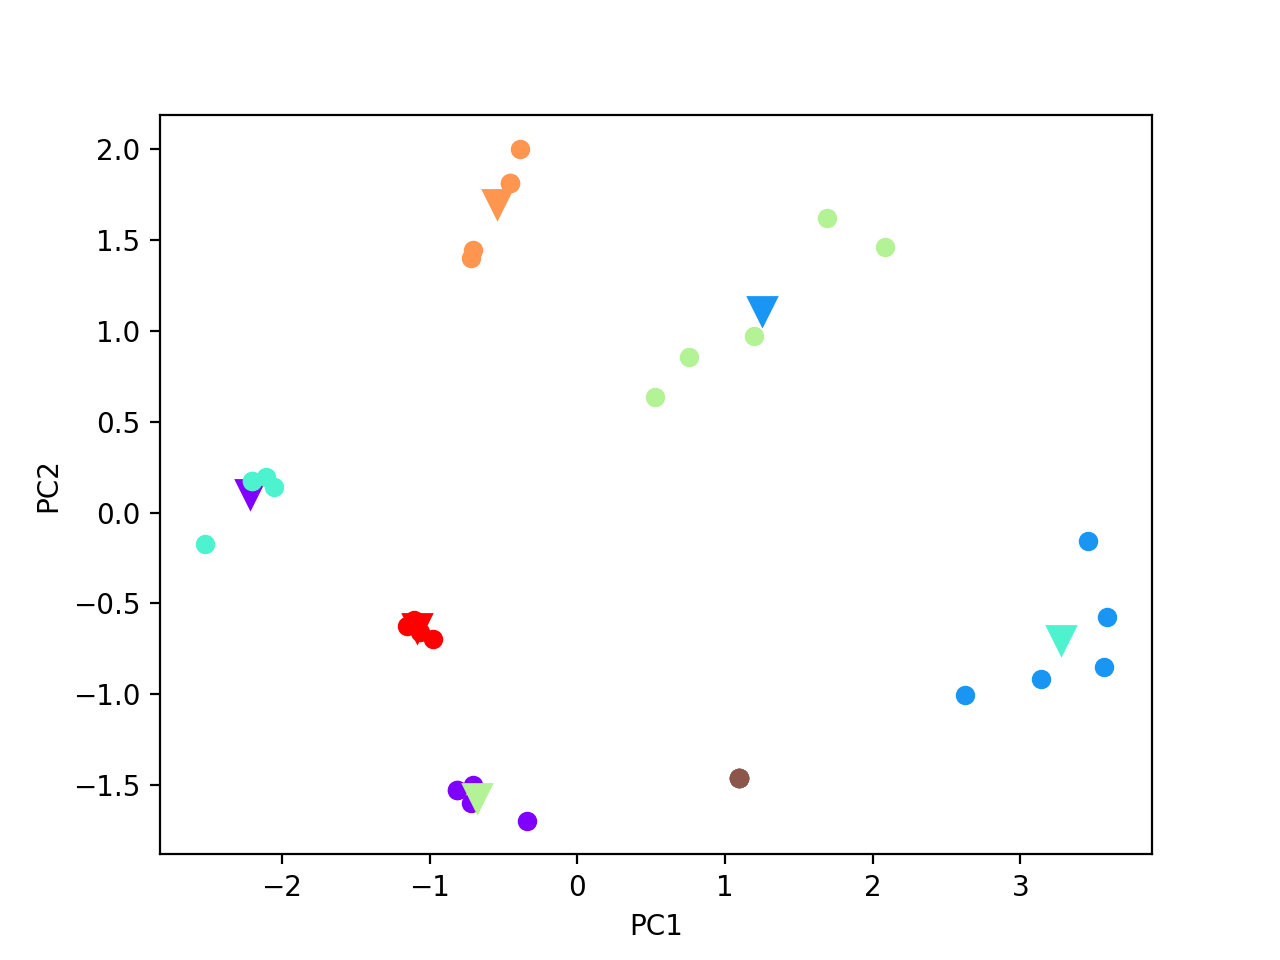

-22
12
33
-7
-5
-11


<function matplotlib.pyplot.show(*args, **kw)>

In [18]:
%matplotlib notebook
for i, (target, color) in enumerate(zip(targets,colors)):
    idx = np.where(true_label == target)
    plt.plot(X[idx,0], X[idx,1], 'o', color = color, alpha = 1)
    plt.plot(cluster_centers[i,0], cluster_centers[i,1], 'v',
             ms = 10, color = color)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    
    centerRnd = int(np.round(cluster_centers[i,0]*10))
    print(centerRnd)
    plt.plot(comp1, comp2, 'o', alpha = 1)
    
plt.show